# Experiencia numero 3: Luckas Diaz - Diego Pincheira

# Configuraciones Preliminares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, exposure
import os
# pip install natsort # Se debe instalar natsorted para ejecutar el código
from natsort import natsorted
import cv2
from google.colab.patches import cv2_imshow
from scipy import ndimage, misc
!pip install ipython-autotime
%load_ext autotime

time: 1.18 ms (started: 2021-08-22 02:44:37 +00:00)


Cargar los archivos *fondo.rar*, *seq1.rar*, *seq2.rar*, *seq3.rar* al notebook. De preferencia, cargar *seq4.rar* **solo cuando es necesario, debido al peso del archivo.**

In [2]:
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/fondo.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq1.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq2.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq3.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq4_1.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq4_2.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq4_3.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq4_4.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq4_5.rar
!wget https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/seq4_6.rar

--2021-08-22 02:44:37--  https://github.com/DiegoPincheiraIb/EL5206_Assignments/raw/master/Experiencia_3/fondo.rar
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DiegoPincheiraIb/EL5206_Assignments/master/Experiencia_3/fondo.rar [following]
--2021-08-22 02:44:38--  https://raw.githubusercontent.com/DiegoPincheiraIb/EL5206_Assignments/master/Experiencia_3/fondo.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7399090 (7.1M) [application/octet-stream]
Saving to: ‘fondo.rar’

fondo.rar           100%[===================>]   7.06M  --.-KB/s    in 0.08s   

2021-08-22 02:44:38 (86.3 MB/s) - ‘fond

Se descomprimen los archivos

In [3]:
!unrar x fondo.rar
!unrar x seq1.rar
!unrar x seq2.rar
!unrar x seq3.rar
!unrar x seq4_1.rar
!unrar x seq4_2.rar
!unrar x seq4_3.rar
!unrar x seq4_4.rar
!unrar x seq4_5.rar
!unrar x seq4_6.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from fondo.rar

Creating    fondo                                                     OK
Extracting  fondo/image-0001.jpg                                           0%  OK 
Extracting  fondo/image-0002.jpg                                           1%  OK 
Extracting  fondo/image-0003.jpg                                           1%  OK 
Extracting  fondo/image-0004.jpg                                           2%  OK 
Extracting  fondo/image-0005.jpg                                           2%  OK 
Extracting  fondo/image-0006.jpg                                           3%  OK 
Extracting  fondo/image-0007.jpg                                           3%  OK 
Extracting  fondo/image-0008.jpg                                           4%  OK 
Extracting  fondo/image-0009.jpg                                           4%  5% 

In [4]:
!ls

fondo	     seq1      seq2.rar  seq4	     seq4_3.rar  seq4_6.rar
fondo.rar    seq1.rar  seq3	 seq4_1.rar  seq4_4.rar
sample_data  seq2      seq3.rar  seq4_2.rar  seq4_5.rar
time: 119 ms (started: 2021-08-22 02:44:51 +00:00)


Se definen los directorios de las imagenes en formato de un **string** y un **listado**.

In [5]:
Str_Fondo = 'fondo/'
Str_SEQ1 = 'seq1/'
Str_SEQ2 = 'seq2/'
Str_SEQ3 = 'seq3/'
Str_SEQ4 = 'seq4/'
Listado_Fondo = os.listdir(Str_Fondo)
Listado_Fondo = natsorted(Listado_Fondo)
Listado_SEQ1 = os.listdir(Str_SEQ1)
Listado_SEQ1 = natsorted(Listado_SEQ1)
Listado_SEQ2 = os.listdir(Str_SEQ2)
Listado_SEQ2 = natsorted(Listado_SEQ2)
Listado_SEQ3 = os.listdir(Str_SEQ3)
Listado_SEQ3 = natsorted(Listado_SEQ3)
Listado_SEQ4 = os.listdir(Str_SEQ4)
Listado_SEQ4 = natsorted(Listado_SEQ4)

time: 28.4 ms (started: 2021-08-22 02:45:03 +00:00)


Esta función convierte a escala de grises una secuencia de imágenes objetivo ubicada en un directorio (definido por un string y un listado). Es posible configurar si se desea bajar la resolución de la secuencia imponiendo "Bajo_Res = True" y acompañandolo del factor deseado (esta opción se encuentra en False por defecto).

In [ ]:
def Equaliz_Array(String_Imagen,Listado_Imagen, Bajo_Res = False, Factor = 1):
  Listado_Obj = np.ndarray((len(Listado_Imagen),int(800*Factor),int(1280*Factor)),dtype=np.int32)
  if Bajo_Res == True:
    for i in range(len(Listado_Imagen)):
      Listado_Obj[i] = np.int32(cv2.resize(cv2.imread(String_Imagen + Listado_Imagen[i],0),(int(1280*Factor),int(800*Factor))))
  else:
    for i in range(len(Listado_Imagen)):
      Listado_Obj[i] = np.int32(cv2.imread(String_Imagen + Listado_Imagen[i],0))
  return Listado_Obj

time: 5.51 ms


Debido a que consume mucha memoria, **NO** es recomendable correr estos parámetros inmediatamente. Estos se calcularán solos al momento de hacer la diferencia binaria. Se dejan propuestos de igual manera para que se verifique su funcionamiento de manera individual, pero se aconseja borrar las variables una vez utilizadas. Se ha incluido un factor opcional de escalamiento con el objetivo de verificar rápidamente los algoritmos, sin caer en errores de memoria.

In [ ]:
Listado_Fondo_Gris = Equaliz_Array(Str_Fondo,Listado_Fondo, True, 0.5)
Listado_SEQ1_Gris = Equaliz_Array(Str_SEQ1,Listado_SEQ1, True, 0.5)
Listado_SEQ2_Gris = Equaliz_Array(Str_SEQ2,Listado_SEQ2, True, 0.5)
Listado_SEQ3_Gris = Equaliz_Array(Str_SEQ3,Listado_SEQ3, True, 0.5)
Listado_SEQ4_Gris = Equaliz_Array(Str_SEQ4,Listado_SEQ4, True, 0.5)

time: 5.17 s


# **Desarrollo P1.1**

Se realiza una diferencia binaria entre dos frames objetivos determinada por un umbral.

In [ ]:
def diff_frames(frame1, frame2, umbral):
  #restar frame y obtener valor absoluto
  resta = cv2.absdiff(frame1, frame2)
  #binarizar la imagen sobre un umbral, para seleccionar el movimiento
  resta_binaria = cv2.threshold(np.float32(resta), umbral, 255, cv2.THRESH_BINARY)
  del resta
  return resta_binaria[1]

time: 2.24 ms


## Cargar esta demostración solo si es necesario.

In [ ]:
diferencia = diff_frames(Listado_SEQ1_Gris[11],Listado_SEQ1_Gris[12],10)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 0 0]
 [2 2 2 ... 1 1 2]
 [1 1 1 ... 0 2 4]]
time: 3.35 ms


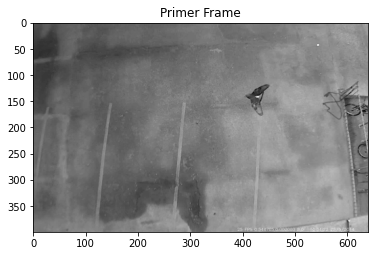

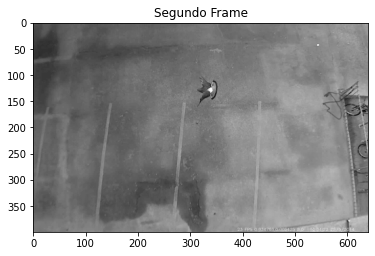

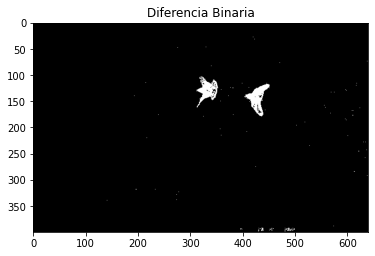

time: 515 ms


In [ ]:
plt.figure()
plt.imshow(Listado_SEQ1_Gris[11], cmap='gray')
plt.title("Primer Frame")
plt.show()
plt.figure()
plt.imshow(Listado_SEQ1_Gris[12], cmap='gray')
plt.title("Segundo Frame")
plt.show()
plt.figure()
plt.imshow(diferencia, cmap='gray')
plt.title("Diferencia Binaria")
plt.show()

Se puede apreciar que los pixeles obtenidos representan la **variación de movimiento** del objeto entre dos frames. Esto se visualiza como el objeto en dos posiciones distintas, siendo una de estas la posición en el frame "i", y la otra en el frame "i+1".

## Diferencia de cuadros:

Esta función calcula la **diferencia de cuadros** entre el frame i y el frame i+1 para una secuencia objetivo ubicada en un directorio (definido por un string y un listado). Es posible configurar si se desea bajar la resolución de la secuencia imponiendo "Bajo_Res = True" y acompañandolo del factor deseado (esta opción se encuentra en False por defecto).

In [ ]:
def Diferencia_Cuadros(Str_Obj, Listado_Obj,Umbral_Obj, Bajo_Res = False, Factor = 1):
  Diff_Obj = np.ndarray((len(Listado_Obj)-1,int(800*Factor),int(1280*Factor)),dtype = np.int32)
  Listado_Img_Obj = Equaliz_Array(Str_Obj, Listado_Obj,Bajo_Res,Factor)
  for i in range(len(Listado_Obj)-1):
    Diff_Obj[i] = diff_frames(Listado_Img_Obj[i],Listado_Img_Obj[i+1],Umbral_Obj)
  del Listado_Img_Obj
  return Diff_Obj

time: 4.24 ms


In [ ]:
Diff_Fondo = Diferencia_Cuadros(Str_Fondo,Listado_Fondo,10, True, 0.5)
Diff_SEQ1 = Diferencia_Cuadros(Str_SEQ1,Listado_SEQ1,10, True, 0.5)
Diff_SEQ2 = Diferencia_Cuadros(Str_SEQ2,Listado_SEQ2,10, True, 0.5)
Diff_SEQ3 = Diferencia_Cuadros(Str_SEQ3,Listado_SEQ3,10, True, 0.5)

time: 6.41 s


In [ ]:
Inicio_Frames_Obj = 0
Fin_Frames_Obj = 50
Diff_Obj = Diff_SEQ1 # Cambiar a Diff_SEQ1, Diff_SEQ2 o Diff_SEQ3 a conveniencia
for i in range(Inicio_Frames_Obj,Fin_Frames_Obj):
  cv2_imshow(Diff_Obj[i])

# **Desarrollo P1.2**

En esta función se calcula la media y la desviación estandar de una secuencia objetivo dado un directorio definido por un string y un listado. Es posible configurar si se desea bajar la resolución de la secuencia imponiendo "Bajo_Res = True" y acompañandolo del factor deseado (esta opción se encuentra en False por defecto).

In [ ]:
def Media_STD(Str_Obj,Listado_Obj, Bajo_Res = False, Factor = 0.5):
  Eq_Obj = Equaliz_Array(Str_Obj,Listado_Obj,Bajo_Res,Factor)
  Media_Obj = np.mean(Eq_Obj,axis=0)
  STD_Obj = np.std(Eq_Obj,axis=0)
  del Eq_Obj
  return Media_Obj, STD_Obj

time: 5 ms


In [ ]:
def Detector_Mov(Media_Obj, STD_Obj, Eq_Obj, Umbral_Obj):
  Matriz_Obj = np.zeros(Eq_Obj.shape)
  Matriz_Unos_Obj = np.ones(Eq_Obj[0].shape) * 255
  Ceros = np.zeros(Eq_Obj[0].shape)
  for i in range(len(Eq_Obj)):
    Matriz_Obj[i] = np.where((Eq_Obj[i]<(Media_Obj - Umbral_Obj*(STD_Obj+1)))|(Eq_Obj[i]>(Media_Obj + Umbral_Obj*(STD_Obj+1))),Matriz_Unos_Obj,Ceros)
  return Matriz_Obj

time: 2.91 ms


In [ ]:
Media_Fondo, STD_Fondo = Media_STD(Str_Fondo,Listado_Fondo, True, 0.5)
Listado_SEQ1_Gris = Equaliz_Array(Str_SEQ1,Listado_SEQ1, True, 0.5)
Detector_SEQ1 = Detector_Mov(Media_Fondo,STD_Fondo,Listado_SEQ1_Gris,14.5)
# -------------------------------
Listado_SEQ2_Gris = Equaliz_Array(Str_SEQ2,Listado_SEQ2, True, 0.5)
Detector_SEQ2 = Detector_Mov(Media_Fondo,STD_Fondo,Listado_SEQ2_Gris,14.5)
# -------------------------------
Listado_SEQ3_Gris = Equaliz_Array(Str_SEQ3,Listado_SEQ3, True, 0.5)
Detector_SEQ3 = Detector_Mov(Media_Fondo,STD_Fondo,Listado_SEQ3_Gris,14.5)

time: 9.85 s


In [ ]:
Inicio_Frames_Obj = 0
Fin_Frames_Obj = 50
Detector_Obj = Detector_SEQ1 # Cambiar a Detector_SEQ1, Detector_SEQ2 o Detector_SEQ3 a conveniencia
for i in range(Inicio_Frames_Obj,Fin_Frames_Obj):
  cv2_imshow(Detector_Obj[i])

## **Desarrollo P1.3**

In [ ]:
def Histogramas(Detector_Obj):
  Filas = np.zeros((Detector_Obj.shape[0],Detector_Obj.shape[1]))
  Cols = np.zeros((Detector_Obj.shape[0],Detector_Obj.shape[2]))
  for j in range(len(Detector_Obj)):
    for i in range(Filas.shape[1]):
      Filas[j][i] = np.histogram(Detector_Obj[j,i,:],bins=256)[0][-1]
    #print(Filas[j])
    for i in range(Cols.shape[1]):
      Cols[j][i] = np.histogram(Detector_Obj[j,:,i],bins=256)[0][-1]
  return Filas, Cols

time: 3.98 ms


La función **Deteccion_Average_BG** realiza la detección de movimiento en base a las filas y columnas obtenidas por la función **Histogramas()**, apoyandose en las funciones **Coeficientes_Filtro_PBj()** y **Filtrado_BW()** para ejecutar el algoritmo. Es posible evitar el plot de los elementos de la secuencia agregando "Plot_Elementos = False". Si se desea evitar el plot de los histogramas, se puede añadir "Plot_Histograms = False" dentro de los parámetros.

In [ ]:
from scipy import signal
# Referencia:   https://dsp.stackexchange.com/questions/49460/apply-low-pass-butterworth-filter-in-python
def Coeficientes_Filtro_PBj(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def Filtrado_BW(data, cutoff_freq, nyq_freq, order=4):
    # Fuente: https://github.com/guillaume-chevalier/filtering-stft-and-laplace-transform
    b, a = Coeficientes_Filtro_PBj(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y
import matplotlib.patches as patches

def Deteccion_Average_BG(Filas_Obj, Col_Obj, Secuencia_Obj,Umbral=22,Plot_Elementos = True,Plot_Histograms = True):
  for i in range(len(Secuencia_Obj)):
    if max(Col_Obj[i])>Umbral and max(Filas_Obj[i])>Umbral:
      Filtrado_Fil = Filtrado_BW(Filas_Obj[i],2,60,2)
      Filtrado_Col = Filtrado_BW(Col_Obj[i],2,60,2)
      Max_Fil = np.where(Filtrado_Fil == Filtrado_Fil.max())[0]
      Min_Fil = np.where(Filtrado_Fil == Filtrado_Fil.min())[0]
      Max_Col = np.where(Filtrado_Col == Filtrado_Col.max())[0]
      Min_Col = np.where(Filtrado_Col == Filtrado_Col.min())[0]
      if Plot_Elementos == True:
        if Plot_Histograms == True:
          plt.plot(Filtrado_Fil)
          plt.plot(Filtrado_Col)
          plt.title('Hist filtrado ' + str(i))
          plt.legend(['Filas','Columnas'])
          plt.show()
        fig,ax = plt.subplots(1)
        ax.imshow(Secuencia_Obj[i],cmap='gray')
        Caja = patches.Rectangle((Min_Col[0],Min_Fil[0]), 1.8*(Max_Col[0]-Min_Col[0]),1.8*(Max_Fil[0]-Min_Fil[0]),linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(Caja)
        ax.text(Min_Col[0]/Col_Obj.shape[1],1 - (Min_Fil[0]/Filas_Obj.shape[1]), 'Objeto',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
        plt.title('Frame ' + str(i))
        plt.show()

time: 25.3 ms


In [ ]:
F1,C1 = Histogramas(Detector_SEQ1)
Deteccion_Average_BG(F1,C1,Detector_SEQ1) # Detector en la secuencia binaria
Deteccion_Average_BG(F1,C1,Listado_SEQ1_Gris) # Detector en la imagen original
# -------------------------------
F2,C2 = Histogramas(Detector_SEQ2)
Deteccion_Average_BG(F2,C2,Detector_SEQ2) # Detector en la secuencia binaria
Deteccion_Average_BG(F2,C2,Listado_SEQ2_Gris) # Detector en la imagen original
# -------------------------------
F3,C3 = Histogramas(Detector_SEQ3)
Deteccion_Average_BG(F3,C3,Detector_SEQ3) # Detector en la secuencia binaria
Deteccion_Average_BG(F3,C3,Listado_SEQ3_Gris) # Detector en la imagen original

## **Desarrollo P1.4**

La función **Estimacion_Average_BG()** recibe filas y columnas provenientes de la función Histogramas(), una secuencia objetivo, un umbral opcional, y un indicador si se desea plotear los elementos, entregando la secuencia a la que se le ha añadido "boxes" que permiten identificar al objeto en movimiento. El cuadro rojo representa al objeto en movimiento. El cuadro azul representa la **predicción del frame actual**, mientras que el cuadro verde  representa la predicción del **frame siguiente**.

In [ ]:
def Estimacion_Average_BG(Filas_Obj, Col_Obj, Secuencia_Obj,Umbral=22,Plot_Elementos = True):
  Indicador = False
  Origen_Sig = (0,0)
  Ancho_Sig = 0
  Alto_Sig = 0
  for i in range(len(Secuencia_Obj)): # len(Secuencia_Obj)
    if max(Col_Obj[i])>Umbral and max(Filas_Obj[i])>Umbral:
      Filtrado_Fil = Filtrado_BW(Filas_Obj[i],2,60,2)
      Filtrado_Col = Filtrado_BW(Col_Obj[i],2,60,2)
      Max_Fil = np.where(Filtrado_Fil == Filtrado_Fil.max())[0]
      Min_Fil = np.where(Filtrado_Fil == Filtrado_Fil.min())[0]
      Max_Col = np.where(Filtrado_Col == Filtrado_Col.max())[0]
      Min_Col = np.where(Filtrado_Col == Filtrado_Col.min())[0]
      if i !=0:
        Alto_Caja = 2*abs(Max_Fil - Min_Fil)
        Ancho_Caja = 2*abs(Max_Col - Min_Col)
        Origen_Caja = (Max_Col -Ancho_Caja/2,Max_Fil - Alto_Caja/2)
        # -------
        Filtrado_Fil_Ant = Filtrado_BW(Filas_Obj[i-1],2,60,2)
        Filtrado_Col_Ant = Filtrado_BW(Col_Obj[i-1],2,60,2)
        Max_Fil_Ant = np.where(Filtrado_Fil_Ant == Filtrado_Fil_Ant.max())[0]
        Min_Fil_Ant = np.where(Filtrado_Fil_Ant == Filtrado_Fil_Ant.min())[0]
        Max_Col_Ant = np.where(Filtrado_Col_Ant == Filtrado_Col_Ant.max())[0]
        Min_Col_Ant = np.where(Filtrado_Col_Ant == Filtrado_Col_Ant.min())[0]
        Alto_Caja_Ant = 2*abs(Max_Fil_Ant - Min_Fil_Ant)
        Ancho_Caja_Ant = 2*abs(Max_Col_Ant - Min_Col_Ant)
        Origen_Caja_Ant = (Max_Col_Ant -Ancho_Caja_Ant/2,Max_Fil_Ant - Alto_Caja_Ant/2)
        if Plot_Elementos == True:
          #plt.plot(Filtrado_Fil)
          #plt.plot(Filtrado_Col)
          #plt.title('Hist filtrado ' + str(i))
          #plt.show()
          fig,ax = plt.subplots(1)
          ax.imshow(Secuencia_Obj[i],cmap='gray')
          Caja = patches.Rectangle(Origen_Caja, Ancho_Caja,Alto_Caja,linewidth=1,edgecolor='r',facecolor='none')
          ax.add_patch(Caja)
          if i!=0 and Indicador == True:
            Siguiente = patches.Rectangle(Origen_Sig,
                                        Ancho_Sig,
                                              Alto_Sig,
                                        linewidth=1,edgecolor='b',facecolor='none')
            ax.add_patch(Siguiente)
            Origen_Sig = (2 * Origen_Caja[0] - Origen_Caja_Ant[0],2 * Origen_Caja[1] - Origen_Caja_Ant[1])
            Ancho_Sig = 2 * Ancho_Caja - Ancho_Caja_Ant
            Alto_Sig = 2 * Alto_Caja - Alto_Caja_Ant
            Estimado = patches.Rectangle(Origen_Sig,
                                        Ancho_Sig,
                                              Alto_Sig,
                                        linewidth=1,edgecolor='g',facecolor='none')
            ax.add_patch(Estimado)
          plt.title('Frame ' + str(i))
          plt.show()
          Indicador = True
    else:
      Indicador = False
      Origen_Sig = (0,0)
      Ancho_Sig = 0
      Alto_Sig = 0

time: 66.7 ms


In [ ]:
F1,C1 = Histogramas(Detector_SEQ1)
Estimacion_Average_BG(F1,C1,Listado_SEQ1_Gris)
# -------------------------------
F2,C2 = Histogramas(Detector_SEQ2)
Estimacion_Average_BG(F2,C2,Listado_SEQ2_Gris)
# -------------------------------
F3,C3 = Histogramas(Detector_SEQ3)
Estimacion_Average_BG(F3,C3,Listado_SEQ3_Gris)

Se puede apreciar en las imágenes que, para objetos cuyo movimiento es constante frame a frame, el algortmo predice relativamente acertada el movimiento del objeto; para objetos cuyo movimiento es relativo (como es el caso de la paloma en la secuencia 1, frames 11 a 17), la predicción no es tan acertada debido al cambio de forma que capta la cámara al aletear la paloma.

## Desarrollo P5

Se puede apreciar que el algoritmo construido *considera a toda la imagen* como el elemento que se está moviendo, ya que **no posee la información del fondo correspondiente a la secuencia**; en adición, los frames corresponden a una cámara **en movimiento**, en donde cada frame se encuentra desplazado del siguiente. Considerando esto y lo ilustrado en la secuencia, se puede apreciar que este método tiene dos grandes debilidades: requiere un fondo adecuado a la secuencia de imágenes, y este fondo debe ser estático.

In [ ]:
Media_Fondo, STD_Fondo = Media_STD(Str_Fondo,Listado_Fondo, True, 0.5)
Listado_SEQ4_Gris = Equaliz_Array(Str_SEQ4,Listado_SEQ4, True, 0.5)
Detector_SEQ4 = Detector_Mov(Media_Fondo,STD_Fondo,Listado_SEQ4_Gris,30)
F4,C4 = Histogramas(Detector_SEQ4)
Estimacion_Average_BG(F4,C4,Listado_SEQ4_Gris)